# Complete Code for Your Jupyter Notebook
Cell 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


Cell 2: Load Data

In [2]:
# Load Boston Housing Dataset
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

print("Dataset Shape:", boston_df.shape)
print("\nFirst 5 rows:")
display(boston_df.head())
print("\nDataset Info:")
boston_df.info()
print("\nBasic Statistics:")
display(boston_df.describe())


Dataset Shape: (506, 14)

First 5 rows:


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB

Basic Statistics:


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Task 2: Visualizations
Visualization 1: Boxplot for MEDV

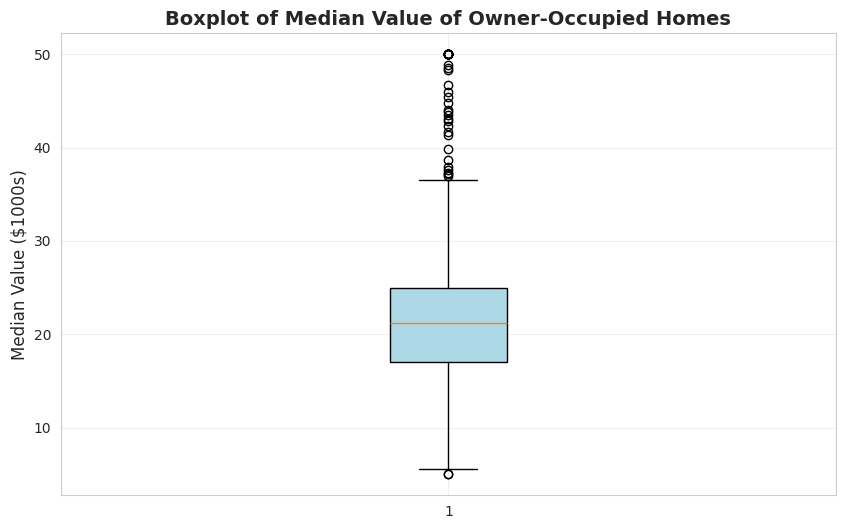


📊 MEDV Statistics:
Mean: $22.53k
Median: $21.20k
Q1 (25th percentile): $17.02k
Q3 (75th percentile): $25.00k
IQR: $7.98k

📝 Explanation: The boxplot shows the median home value is around $21-22k,
with 50% of homes valued between $17k-25k. Outliers exist above $40k.


In [3]:
plt.figure(figsize=(10, 6))
plt.boxplot(boston_df['MEDV'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot of Median Value of Owner-Occupied Homes', fontsize=14, fontweight='bold')
plt.ylabel('Median Value ($1000s)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Statistics
print("\n📊 MEDV Statistics:")
print(f"Mean: ${boston_df['MEDV'].mean():.2f}k")
print(f"Median: ${boston_df['MEDV'].median():.2f}k")
print(f"Q1 (25th percentile): ${boston_df['MEDV'].quantile(0.25):.2f}k")
print(f"Q3 (75th percentile): ${boston_df['MEDV'].quantile(0.75):.2f}k")
print(f"IQR: ${boston_df['MEDV'].quantile(0.75) - boston_df['MEDV'].quantile(0.25):.2f}k")

print("\n📝 Explanation: The boxplot shows the median home value is around $21-22k,")
print("with 50% of homes valued between $17k-25k. Outliers exist above $40k.")


Visualization 2: Bar Plot for Charles River

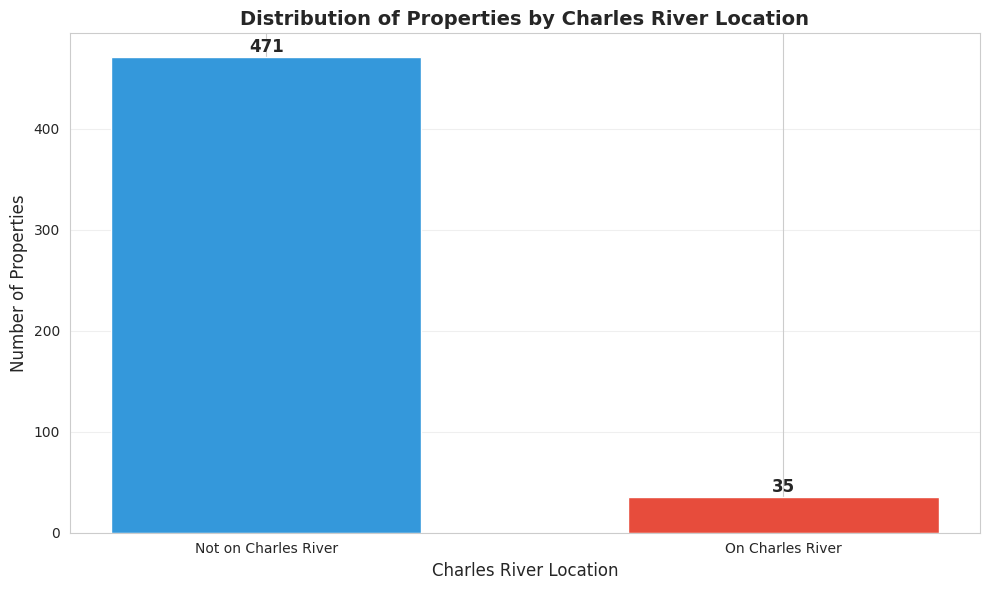


📊 Distribution:
Properties NOT on Charles River: 471 (93.1%)
Properties ON Charles River: 35 (6.9%)

📝 Explanation: The vast majority of properties are not directly bounded by
the Charles River, making riverfront properties a premium market segment.


In [4]:
plt.figure(figsize=(10, 6))
chas_counts = boston_df['CHAS'].value_counts()
bars = plt.bar(['Not on Charles River', 'On Charles River'],
               chas_counts.values, color=['#3498db', '#e74c3c'], width=0.6)
plt.title('Distribution of Properties by Charles River Location',
          fontsize=14, fontweight='bold')
plt.ylabel('Number of Properties', fontsize=12)
plt.xlabel('Charles River Location', fontsize=12)

# Add value labels on bars
for i, v in enumerate(chas_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold', fontsize=12)

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\n📊 Distribution:")
print(f"Properties NOT on Charles River: {chas_counts[0]} ({chas_counts[0]/len(boston_df)*100:.1f}%)")
print(f"Properties ON Charles River: {chas_counts[1]} ({chas_counts[1]/len(boston_df)*100:.1f}%)")
print("\n📝 Explanation: The vast majority of properties are not directly bounded by")
print("the Charles River, making riverfront properties a premium market segment.")


Visualization 3: Boxplot MEDV vs AGE Groups

<Figure size 1200x600 with 0 Axes>

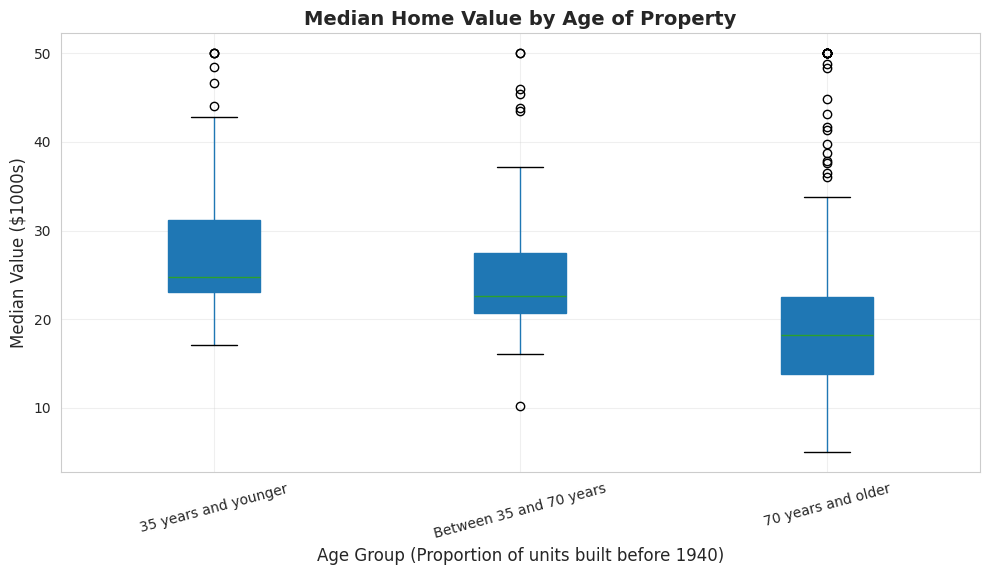


📊 Statistics by Age Group:


,count,mean,std,min,25%,50%,75%,max
AGE_GROUP,,,,,,,,
35 years and younger,91.0,27.775824,7.638198,17.1,23.050,24.8,31.150,50.0
Between 35 and 70 years,128.0,24.947656,6.969370,10.2,20.675,22.6,27.425,50.0
70 years and older,287.0,19.793380,9.515375,5.0,13.800,18.2,22.550,50.0



📝 Explanation: This visualization compares home values across different
age categories, showing whether older or newer properties command higher prices.


In [5]:
# Discretize AGE into three groups
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'],
                                 bins=[0, 35, 70, 100],
                                 labels=['35 years and younger',
                                        'Between 35 and 70 years',
                                        '70 years and older'])

plt.figure(figsize=(12, 6))
boston_df.boxplot(column='MEDV', by='AGE_GROUP', grid=False, patch_artist=True)
plt.title('Median Home Value by Age of Property', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title
plt.xlabel('Age Group (Proportion of units built before 1940)', fontsize=12)
plt.ylabel('Median Value ($1000s)', fontsize=12)
plt.xticks(rotation=15)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Statistics by Age Group:")
display(boston_df.groupby('AGE_GROUP')['MEDV'].describe())
print("\n📝 Explanation: This visualization compares home values across different")
print("age categories, showing whether older or newer properties command higher prices.")


Visualization 4: Scatter Plot NOX vs INDUS

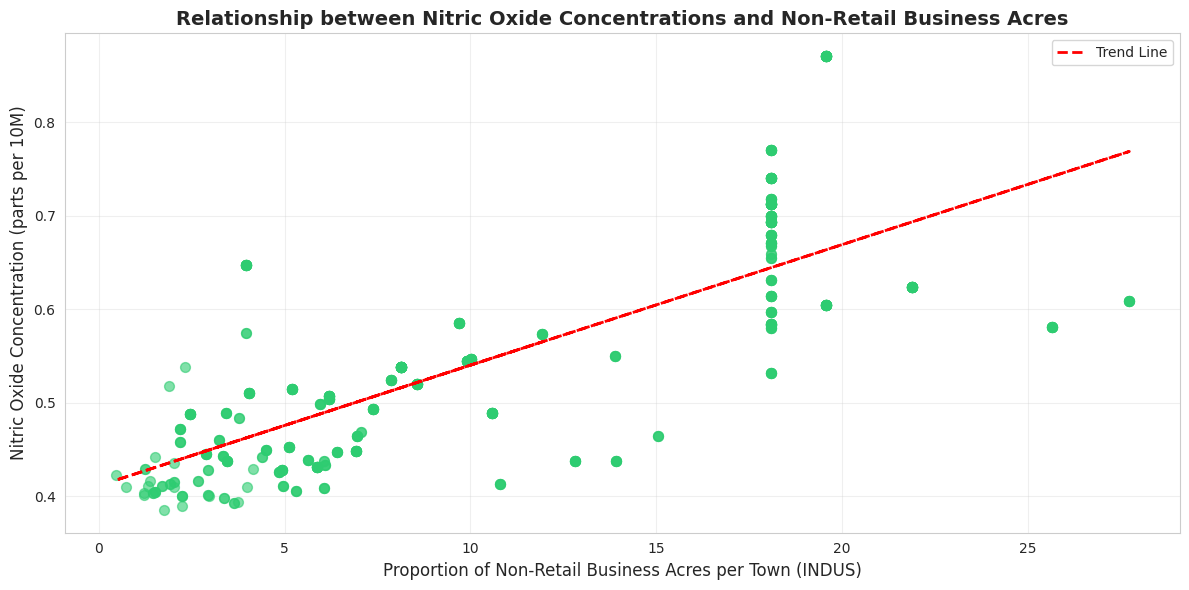


📊 Correlation coefficient: 0.7637

📝 Interpretation: There is a STRONG POSITIVE relationship (r = 0.7637)
between industrial areas and nitric oxide concentrations. Areas with more
non-retail business show significantly higher pollution levels.


In [6]:
plt.figure(figsize=(12, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'], alpha=0.6, s=50, color='#2ecc71')
plt.title('Relationship between Nitric Oxide Concentrations and Non-Retail Business Acres',
          fontsize=14, fontweight='bold')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)', fontsize=12)
plt.ylabel('Nitric Oxide Concentration (parts per 10M)', fontsize=12)

# Add trend line
z = np.polyfit(boston_df['INDUS'], boston_df['NOX'], 1)
p = np.poly1d(z)
plt.plot(boston_df['INDUS'], p(boston_df['INDUS']), "r--",
         linewidth=2, label='Trend Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

correlation = boston_df['INDUS'].corr(boston_df['NOX'])
print(f"\n📊 Correlation coefficient: {correlation:.4f}")
print(f"\n📝 Interpretation: There is a STRONG POSITIVE relationship (r = {correlation:.4f})")
print("between industrial areas and nitric oxide concentrations. Areas with more")
print("non-retail business show significantly higher pollution levels.")


Visualization 5: Histogram for Pupil-Teacher Ratio

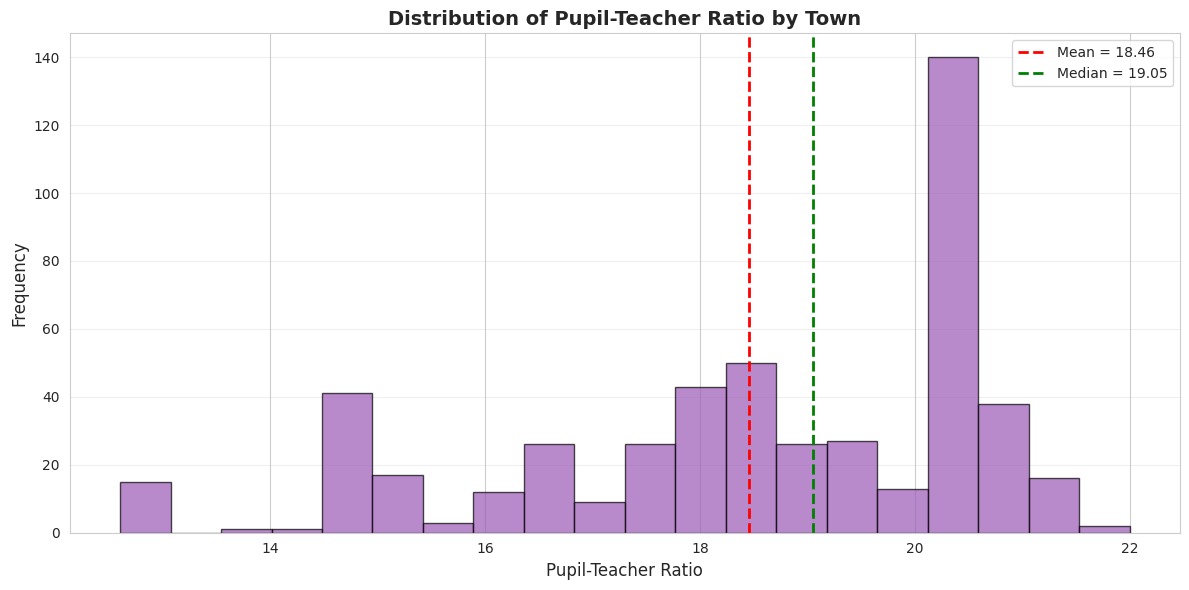


📊 Pupil-Teacher Ratio Statistics:
Mean: 18.46
Median: 19.05
Std Dev: 2.16
Range: 12.60 to 22.00

📝 Explanation: The distribution shows typical class sizes across Boston towns,
with most areas having pupil-teacher ratios between 18-22.


In [7]:
plt.figure(figsize=(12, 6))
plt.hist(boston_df['PTRATIO'], bins=20, color='#9b59b6',
         edgecolor='black', alpha=0.7)
plt.title('Distribution of Pupil-Teacher Ratio by Town', fontsize=14, fontweight='bold')
plt.xlabel('Pupil-Teacher Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(boston_df['PTRATIO'].mean(), color='red', linestyle='--',
            linewidth=2, label=f'Mean = {boston_df["PTRATIO"].mean():.2f}')
plt.axvline(boston_df['PTRATIO'].median(), color='green', linestyle='--',
            linewidth=2, label=f'Median = {boston_df["PTRATIO"].median():.2f}')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\n📊 Pupil-Teacher Ratio Statistics:")
print(f"Mean: {boston_df['PTRATIO'].mean():.2f}")
print(f"Median: {boston_df['PTRATIO'].median():.2f}")
print(f"Std Dev: {boston_df['PTRATIO'].std():.2f}")
print(f"Range: {boston_df['PTRATIO'].min():.2f} to {boston_df['PTRATIO'].max():.2f}")
print("\n📝 Explanation: The distribution shows typical class sizes across Boston towns,")
print("with most areas having pupil-teacher ratios between 18-22.")


# Task 3: Hypothesis Testing
Test 1: T-Test for Charles River Impact

In [8]:
print("="*80)
print("HYPOTHESIS TEST 1: Charles River Impact on Home Values (T-Test)")
print("="*80)

# Separate data
river_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
river_no = boston_df[boston_df['CHAS'] == 0]['MEDV']

# State hypotheses
print("\n📋 Hypotheses:")
print("H0: There is NO significant difference in median home values between")
print("    houses bounded by Charles River and those that are not. (μ1 = μ2)")
print("H1: There IS a significant difference in median home values between")
print("    houses bounded by Charles River and those that are not. (μ1 ≠ μ2)")
print("\n⚖️ Significance Level: α = 0.05")

# Descriptive statistics
print("\n📊 Descriptive Statistics:")
print(f"Houses ON Charles River (n={len(river_yes)}):")
print(f"  Mean: ${river_yes.mean():.2f}k, Median: ${river_yes.median():.2f}k, SD: ${river_yes.std():.2f}k")
print(f"Houses NOT on Charles River (n={len(river_no)}):")
print(f"  Mean: ${river_no.mean():.2f}k, Median: ${river_no.median():.2f}k, SD: ${river_no.std():.2f}k")

# Perform t-test
t_stat, p_val = ttest_ind(river_yes, river_no)

print("\n🔬 Test Statistics:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# Conclusion
print("\n✅ CONCLUSION:")
if p_val < 0.05:
    print(f"Since p-value ({p_val:.4f}) < α (0.05), we REJECT the null hypothesis.")
    print("\n🎯 There IS a statistically significant difference in median home values")
    print("between houses bounded by the Charles River and those that are not.")
    print(f"\n💡 Management Insight: Houses on the Charles River have an average")
    print(f"value ${river_yes.mean() - river_no.mean():.2f}k higher than non-riverfront homes.")
else:
    print(f"Since p-value ({p_val:.4f}) >= α (0.05), we FAIL TO REJECT the null hypothesis.")
    print("\n🎯 There is NO statistically significant difference in median home values.")

print("="*80)


HYPOTHESIS TEST 1: Charles River Impact on Home Values (T-Test)

📋 Hypotheses:
H0: There is NO significant difference in median home values between
    houses bounded by Charles River and those that are not. (μ1 = μ2)
H1: There IS a significant difference in median home values between
    houses bounded by Charles River and those that are not. (μ1 ≠ μ2)

⚖️ Significance Level: α = 0.05

📊 Descriptive Statistics:
Houses ON Charles River (n=35):
  Mean: $28.44k, Median: $23.30k, SD: $11.82k
Houses NOT on Charles River (n=471):
  Mean: $22.09k, Median: $20.90k, SD: $8.83k

🔬 Test Statistics:
T-statistic: 3.9964
P-value: 0.0001

✅ CONCLUSION:
Since p-value (0.0001) < α (0.05), we REJECT the null hypothesis.

🎯 There IS a statistically significant difference in median home values
between houses bounded by the Charles River and those that are not.

💡 Management Insight: Houses on the Charles River have an average
value $6.35k higher than non-riverfront homes.


Test 2: ANOVA for Age Groups

In [9]:
print("\n" + "="*80)
print("HYPOTHESIS TEST 2: Home Values by Age Group (ANOVA)")
print("="*80)

# Prepare groups
group1 = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == 'Between 35 and 70 years']['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

# State hypotheses
print("\n📋 Hypotheses:")
print("H0: There is NO significant difference in median home values across")
print("    different age groups. (μ1 = μ2 = μ3)")
print("H1: At least one age group has a significantly different median home")
print("    value from the others.")
print("\n⚖️ Significance Level: α = 0.05")

# Descriptive statistics
print("\n📊 Descriptive Statistics by Age Group:")
for name, data in [('35 years and younger', group1),
                   ('Between 35 and 70 years', group2),
                   ('70 years and older', group3)]:
    print(f"\n{name} (n={len(data)}):")
    print(f"  Mean: ${data.mean():.2f}k, Median: ${data.median():.2f}k, SD: ${data.std():.2f}k")

# Perform ANOVA
f_stat, p_val_anova = f_oneway(group1, group2, group3)

print("\n🔬 Test Statistics:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val_anova:.4f}")

# Detailed ANOVA table using statsmodels
model = ols('MEDV ~ C(AGE_GROUP)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
print("\n📋 ANOVA Table:")
display(anova_table)

# Conclusion
print("\n✅ CONCLUSION:")
if p_val_anova < 0.05:
    print(f"Since p-value ({p_val_anova:.4f}) < α (0.05), we REJECT the null hypothesis.")
    print("\n🎯 There IS a statistically significant difference in median home values")
    print("across different age groups of properties.")
    print("\n💡 Management Insight: Property age significantly affects home values.")
    print("This should be factored into pricing strategies and investment decisions.")
else:
    print(f"Since p-value ({p_val_anova:.4f}) >= α (0.05), we FAIL TO REJECT the null hypothesis.")
    print("\n🎯 There is NO statistically significant difference across age groups.")

print("="*80)



HYPOTHESIS TEST 2: Home Values by Age Group (ANOVA)

📋 Hypotheses:
H0: There is NO significant difference in median home values across
    different age groups. (μ1 = μ2 = μ3)
H1: At least one age group has a significantly different median home
    value from the others.

⚖️ Significance Level: α = 0.05

📊 Descriptive Statistics by Age Group:

35 years and younger (n=91):
  Mean: $27.78k, Median: $24.80k, SD: $7.64k

Between 35 and 70 years (n=128):
  Mean: $24.95k, Median: $22.60k, SD: $6.97k

70 years and older (n=287):
  Mean: $19.79k, Median: $18.20k, SD: $9.52k

🔬 Test Statistics:
F-statistic: 36.4076
P-value: 0.0000

📋 ANOVA Table:


,df,sum_sq,mean_sq,F,PR(>F)
C(AGE_GROUP),2.0,5401.731883,2700.865942,36.40765,1.710501e-15
Residual,503.0,37314.563532,74.184023,NaN,NaN



✅ CONCLUSION:
Since p-value (0.0000) < α (0.05), we REJECT the null hypothesis.

🎯 There IS a statistically significant difference in median home values
across different age groups of properties.

💡 Management Insight: Property age significantly affects home values.
This should be factored into pricing strategies and investment decisions.


Test 3: Pearson Correlation for NOX vs INDUS

In [10]:
print("\n" + "="*80)
print("HYPOTHESIS TEST 3: NOX and INDUS Relationship (Pearson Correlation)")
print("="*80)

# State hypotheses
print("\n📋 Hypotheses:")
print("H0: There is NO linear relationship between nitric oxide concentrations")
print("    and proportion of non-retail business acres. (ρ = 0)")
print("H1: There IS a linear relationship between NOX and INDUS. (ρ ≠ 0)")
print("\n⚖️ Significance Level: α = 0.05")

# Calculate Pearson correlation
corr_coef, p_val_corr = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("\n🔬 Test Statistics:")
print(f"Pearson Correlation Coefficient (r): {corr_coef:.4f}")
print(f"P-value: {p_val_corr:.8f}")
print(f"R-squared: {corr_coef**2:.4f} ({corr_coef**2*100:.2f}% of variance explained)")

# Interpret strength
if abs(corr_coef) < 0.3:
    strength = "WEAK"
elif abs(corr_coef) < 0.7:
    strength = "MODERATE"
else:
    strength = "STRONG"

direction = "positive" if corr_coef > 0 else "negative"
print(f"\n📊 Correlation Strength: {strength} {direction} relationship")

# Conclusion
print("\n✅ CONCLUSION:")
if p_val_corr < 0.05:
    print(f"Since p-value ({p_val_corr:.8f}) < α (0.05), we REJECT the null hypothesis.")
    print("\n🎯 There IS a statistically significant relationship between nitric oxide")
    print("concentrations and the proportion of non-retail business acres.")
    print(f"\n💡 Management Insight: The {strength.lower()} {direction} correlation")
    print(f"(r = {corr_coef:.4f}) indicates that areas with more industrial development")
    print("have significantly higher pollution levels. Environmental factors should be")
    print("considered in property valuations and zoning decisions.")
else:
    print(f"Since p-value ({p_val_corr:.8f}) >= α (0.05), we FAIL TO REJECT the null hypothesis.")
    print("\n🎯 We cannot conclude that there is a significant relationship.")

print("="*80)



HYPOTHESIS TEST 3: NOX and INDUS Relationship (Pearson Correlation)

📋 Hypotheses:
H0: There is NO linear relationship between nitric oxide concentrations
    and proportion of non-retail business acres. (ρ = 0)
H1: There IS a linear relationship between NOX and INDUS. (ρ ≠ 0)

⚖️ Significance Level: α = 0.05

🔬 Test Statistics:
Pearson Correlation Coefficient (r): 0.7637
P-value: 0.00000000
R-squared: 0.5832 (58.32% of variance explained)

📊 Correlation Strength: STRONG positive relationship

✅ CONCLUSION:
Since p-value (0.00000000) < α (0.05), we REJECT the null hypothesis.

🎯 There IS a statistically significant relationship between nitric oxide
concentrations and the proportion of non-retail business acres.

💡 Management Insight: The strong positive correlation
(r = 0.7637) indicates that areas with more industrial development
have significantly higher pollution levels. Environmental factors should be
considered in property valuations and zoning decisions.


Test 4: Regression Analysis for Distance Impact


HYPOTHESIS TEST 4: Distance to Employment Centers Impact (Regression)

📋 Hypotheses:
H0: There is NO relationship between distance to employment centers
    and median home values. (β₁ = 0)
H1: There IS a relationship between DIS and MEDV. (β₁ ≠ 0)

⚖️ Significance Level: α = 0.05

🔬 REGRESSION MODEL SUMMARY:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 18 Oct 2025   Prob (F-statistic):           1.21e-08
Time:                        16:17:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                   

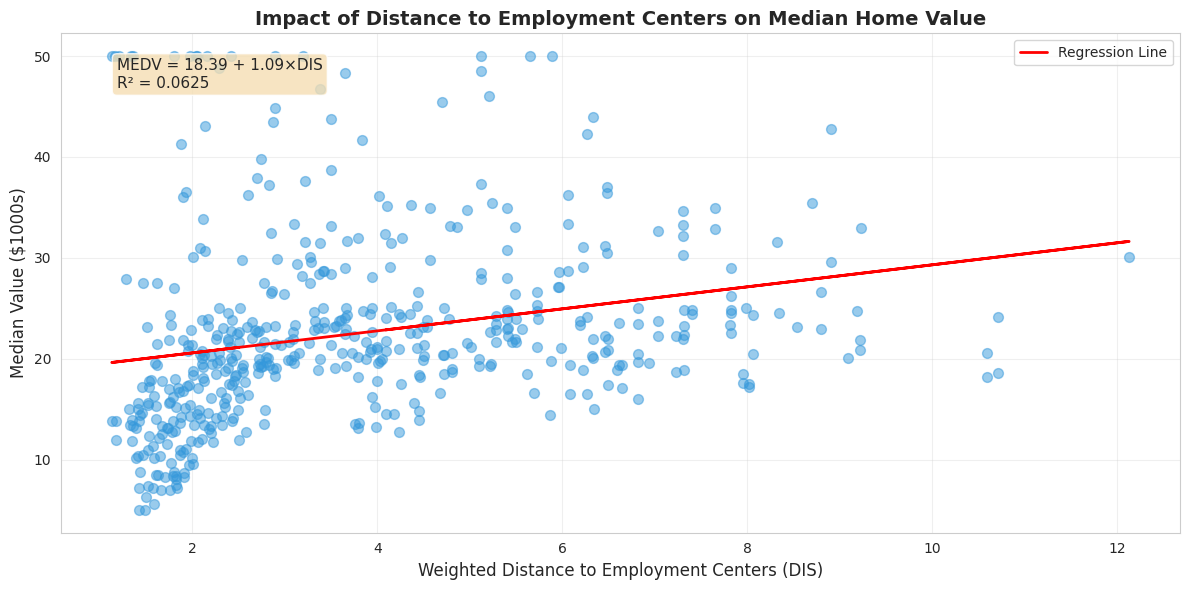

In [11]:
print("\n" + "="*80)
print("HYPOTHESIS TEST 4: Distance to Employment Centers Impact (Regression)")
print("="*80)

# State hypotheses
print("\n📋 Hypotheses:")
print("H0: There is NO relationship between distance to employment centers")
print("    and median home values. (β₁ = 0)")
print("H1: There IS a relationship between DIS and MEDV. (β₁ ≠ 0)")
print("\n⚖️ Significance Level: α = 0.05")

# Prepare regression data
X = boston_df[['DIS']]
y = boston_df['MEDV']
X = sm.add_constant(X)  # Add intercept

# Fit model
regression_model = sm.OLS(y, X).fit()

print("\n🔬 REGRESSION MODEL SUMMARY:")
print(regression_model.summary())

# Extract key statistics
coef_dis = regression_model.params['DIS']
p_val_reg = regression_model.pvalues['DIS']
r_squared = regression_model.rsquared

print("\n📊 Key Findings:")
print(f"Coefficient (β₁): {coef_dis:.4f}")
print(f"P-value: {p_val_reg:.6f}")
print(f"R-squared: {r_squared:.4f}")

print("\n📝 Interpretation:")
print(f"For every 1-unit increase in weighted distance to employment centers,")
print(f"the median home value changes by ${coef_dis:.4f}k (${coef_dis*1000:.2f}).")

if coef_dis > 0:
    print("\n➕ POSITIVE coefficient: Homes farther from employment centers have")
    print("HIGHER values (suburban premium for space/quiet).")
else:
    print("\n➖ NEGATIVE coefficient: Homes farther from employment centers have")
    print("LOWER values (proximity to jobs is valued).")

# Conclusion
print("\n✅ CONCLUSION:")
if p_val_reg < 0.05:
    print(f"Since p-value ({p_val_reg:.6f}) < α (0.05), we REJECT the null hypothesis.")
    print("\n🎯 Distance to employment centers DOES have a statistically significant")
    print("impact on median home values.")
    print(f"\n💡 Management Insight: The model explains {r_squared*100:.2f}% of variation")
    print("in home values. Distance should be incorporated into pricing models.")
else:
    print(f"Since p-value ({p_val_reg:.6f}) >= α (0.05), we FAIL TO REJECT the null hypothesis.")
    print("\n🎯 Distance does NOT have a statistically significant impact.")

print("="*80)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(boston_df['DIS'], boston_df['MEDV'], alpha=0.5, s=50, color='#3498db')
plt.plot(boston_df['DIS'], regression_model.predict(X), color='red',
         linewidth=2, label='Regression Line')
plt.title('Impact of Distance to Employment Centers on Median Home Value',
          fontsize=14, fontweight='bold')
plt.xlabel('Weighted Distance to Employment Centers (DIS)', fontsize=12)
plt.ylabel('Median Value ($1000s)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Add equation box
equation_text = f'MEDV = {regression_model.params["const"]:.2f} + {coef_dis:.2f}×DIS\nR² = {r_squared:.4f}'
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
plt.tight_layout()
plt.show()
